In [31]:
import pandas as pd
# define a function to read the file and the line like 'b O n d' will become 'bOnd'
import re
def get_word(file):
    '''
    input: src or tgt file in which the words are separated by space
    output: a list of strings without space
    '''
    processed_lines =[]
    for word in file:
        word = re.sub(r'(\<.+\>)|\n| ', '', word)
        processed_lines.append(word)
    return processed_lines

# get the wrongly and correclty predicrted results and store them in two lists separately
def get_predictions(pred_lines, test_lines, src_lines, orth_lines):
    '''
    input: the output of get_word function. The four arguments refer to the predicted result, tgt(Y), src(x), and orthographic information of the src file (which contains the orthographic information of the words). 
    output: a list of dictionary with corresponding information.
    '''
    wrong_pred = []
    for i in range(len(test_lines)):
        if test_lines[i]!= pred_lines[i]:
            wrong_pred.append({'present_orth': orth_lines[i],'present_phon': src_lines[i], 'past_phon': test_lines[i], 'pred': pred_lines[i],'correct':False})
        else:
            wrong_pred.append({'present_orth': orth_lines[i],'present_phon': src_lines[i], 'past_phon': test_lines[i], 'pred': pred_lines[i],'correct':True})
    return wrong_pred

with open('result.txt', 'w') as ff:
    ff.write('Language\tExperiment\tLing_feature\tDataset\tAccuracy_overall\tAccuracy_regular\tAccuracy_irregular\n')
    
# evaluate the predicting results
def evaluate(dir_pred, dir_test, dir_merge, dir_orth, dir_src, metainfo):
    '''
    input: the directory of the prediction file, tgt file, language_merge file, 
    the ortho src file (in the grapheme experiment, it is the same file as the src file), src file, and metainfo for better readbility
    metainfo is a list which include ['language', 'experiment+validation folder'(option:replication experiment_i or extended_i), ling_feauture(option:phoneme or grapheme), dataset(option:train, valid, or test)]
    output: the accuracy of overall performance, regular and irregular verbs; and the detailed information of the wrongly predicted results 
    the accuracy information will be stored in the file result.txt
    '''
    pred = open(dir_pred, 'r').readlines()
    test = open(dir_test, 'r').readlines()
    orth = open(dir_orth, 'r').readlines()
    source = open(dir_src, 'r').readlines()
    pred = get_word(pred)
    test = get_word(test)
    orth = get_word(orth)
    source = get_word(source)
    if 'english2' in metainfo:
        merged = pd.read_csv(dir_merge, sep='\t',names=['present_orth', 'past_orth','tense', 'present_phon', 'past_phon', 'reg'])
        wrong_pred = get_predictions(pred, test, source, orth)
    else:
        merged = pd.read_csv(dir_merge, sep='\t',names=['present_orth', 'past_orth', 'present_phon', 'past_phon', 'reg'])
        wrong_pred = get_predictions(pred, test, source, orth)
    test_pred = pd.DataFrame(wrong_pred, columns=['present_orth','present_phon', 'past_phon', 'pred', 'correct'])
    df_test = pd.merge(test_pred, merged)
    irreg = df_test.loc[df_test['reg']=='irreg']
    reg =  df_test.loc[df_test['reg']=='reg']
    irreg_wrong = df_test.loc[(df_test['reg']=='irreg') & (df_test['correct']==False)]
    reg_wrong = df_test.loc[(df_test['reg']=='reg') & (df_test['correct']==False)]
    wrong = df_test.loc[df_test['correct']==False]
    acc_irregular  = round(1-len(irreg_wrong)/len(irreg),3)
    acc_regular = round(1-len(reg_wrong)/len(reg),3)
    acc = round((1-len(wrong)/len(test)), 3)
    print('accuracy overall\taccuracy_regular\taccuracy_irregular')
    print('-'*100)
    print(acc, '\t\t', acc_regular, '\t\t', acc_irregular)
    acc_info = {'acc_overall': acc, 'acc_regular': acc_regular, 'acc_irregular': acc_irregular}
    with open('result.txt', 'a') as f:
        f.write(f'{metainfo[0]}\t{metainfo[1]}\t{metainfo[2]}\t{metainfo[3]}\t{acc}\t{acc_regular}\t{acc_irregular}\n')
    title = '_'.join(metainfo)
    irreg_wrong.to_csv(f'{title}_irreg.csv', sep='\t')
    reg_wrong.to_csv(f'{title}_regular.csv',sep='\t')
    return  irreg_wrong, reg_wrong,  acc_info

# Experiment 1

## phoneme input: syllables of words output: past tense of words

In [19]:
# build the vocab 
!onmt_build_vocab -config cross_validation/phon/english1/1/english1.yaml -n_sample 3300

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 12:18:47,011 INFO] Counter vocab from 3300 samples.
[2022-10-10 12:18:47,011 INFO] Build vocab on 3300 transformed examples/corpus.
[2022-10-10 12:18:47,650 INFO] Counters src:38
[2022-10-10 12:18:47,650 INFO] Counters tgt:39


In [20]:
# train the data
!onmt_train -config cross_validation/phon/english1/1/english1.yaml

[2022-10-10 12:20:21,473 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-10 12:20:21,474 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 12:20:21,476 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-10 12:20:21,476 INFO] Parsed 2 corpora from -data.
[2022-10-10 12:20:21,476 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-10 12:20:21,476 INFO] Loading vocab from text file...
[2022-10-10 12:20:21,477 INFO] Loading src vocabulary from cross_validation/phon/english1/1/example.vocab.src
[2022-10-10 12:20:21,478 INFO] Loaded src vocab has 38 tokens.
[2022-10-10 12:20:21,478 INFO] Loading tgt vocabulary from cross_validation/phon/english1/1/example.vocab.tgt
[2022-10-10 12:20:21,478 INFO] Loaded tgt vocab has 39 tokens.
[2022-10-10 12:20:21,478 INFO] Building fields with vocab in counters...
[2022-10-10 12:20:21,478 INFO]  * tgt vocab size: 43.
[2022-10-10 12:2

In [21]:
# predict the test set
!onmt_translate -model cross_validation/phon/english1/1/model_step_16155.pt -src cross_validation/phon/english1/1/src_test.txt -output cross_validation/phon/english1/1/pred_experiment1.txt -verbose


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 12:49:59,703 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 12:49:59,835 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [24]:
# predict the train data set
!onmt_translate -model cross_validation/phon/english1/1/model_step_16155.pt -src cross_validation/phon/english1/1/src_train.txt -output cross_validation/phon/english1/1/pred_experiment_train.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 12:50:55,794 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 12:50:55,962 INFO] 
SENT 1: ['s', 'j', 'u', ':']
PRED 1: s j u : d
PRED SCO

In [25]:
# predict the valid data set 
!onmt_translate -model cross_validation/phon/english1/1/model_step_16155.pt -src cross_validation/phon/english1/1/src_valid.txt -output cross_validation/phon/english1/1/pred_experiment_valid.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 12:51:06,612 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 12:51:06,722 INFO] 
SENT 1: ['t', 'r', 'E', 'd']
PRED 1: t r E d I d
PRED S

In [30]:
import pandas as pd
#please change the directory!!!! 
english = 'cross_validation/english_merged_01.txt'
eng_pred_test = 'cross_validation/phon/english1/1/pred_experiment1.txt'
eng_tgt_test = 'cross_validation/phon/english1/1/tgt_test.txt'
eng_src_test = 'cross_validation/phon/english1/1/src_test.txt'
eng_orth_test ='cross_validation/orth/english1/1/src_test.txt'

eng_orth_train = 'cross_validation/orth/english1/1/src_train.txt'
eng_pred_train= 'cross_validation/phon/english1/1/pred_experiment_train.txt'
eng_tgt_train = 'cross_validation/phon/english1/1/tgt_train.txt'
eng_src_train = 'cross_validation/phon/english1/1/src_train.txt'

eng_pred_valid = 'cross_validation/phon/english1/1/pred_experiment_valid.txt'
eng_tgt_valid = 'cross_validation/phon/english1/1/tgt_valid.txt'
eng_orth_valid = 'cross_validation/orth/english1/1/src_valid.txt'
eng_src_valid = 'cross_validation/phon/english1/1/src_valid.txt'

metainfo_test = ['English', 'replication1', 'phoneme', 'test']
irreg_eng1, reg_eng1, acc_eng1 = evaluate(eng_pred_test, eng_tgt_test, english, eng_orth_test, eng_src_test, metainfo_test)
metainfo_train =['English', 'replication1', 'phoneme', 'train']
irreg_eng_train, reg_eng_train, acc_eng_train = evaluate(eng_pred_train, eng_tgt_train, english, eng_orth_train,eng_src_train,metainfo_train)
metainfo_valid = ['English', 'replication1', 'phoneme', 'valid']
irreg_eng_valid, reg_eng_valid, acc_eng_valid = evaluate(eng_pred_valid, eng_tgt_valid, english, eng_orth_valid,eng_src_valid, metainfo_valid)


len(irreg_eng1)
len(irreg_eng_valid)

irreg_eng_valid

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.965 		 0.992 		 0.353
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.999 		 0.999 		 0.984
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.953 		 0.99 		 0.211


present_orth present_phon past_phon      pred  correct  past_orth    reg
0          tread         trEd      trOd    trEdId    False       trod  irreg
19        befall       b@fO:l     b@fEl   b@fO:ld    False     befell  irreg
44         grind       graInd    graUnd  graIndId    False     ground  irreg
66          come          kVm      keIm      kVmd    False       came  irreg
67       mistake      mIsteIk    mIstUk  mIsteIkt    False    mistook  irreg
109       forget        f@gEt     f@gOt   f@gEtId    False     forgot  irreg
120    undertake     Vnd@teIk  Vnd@tu:k   Vnd@tUk    False  undertook  irreg
170         hang          h&N       hVN      h&Nd    False       hung  irreg
235      rethink      ri:TINk   ri:TO:t  ri:TINkt    False  rethought  irreg
287           go          g@U      wEnt      g@Ud    False       went  irreg
290      overrun      @Uv@rVn   @Uv@r&n  @Uv@rVnd    False    overran  irreg
308        bleed        bli:d      blEd   bli:dId    False       bled  irreg
336        fight         faIt      fO:t    faItId    False     fought  irreg
384        spend        spEnd     spEnt   spEndId    False      spent  irreg
400        breed        bri:d      brEd   bri:dId    False       bred  irreg

In [14]:
irreg_eng1

present_orth present_phon past_phon        pred  correct  past_orth    reg
112         blow         bl@U      blu:       bl@Ud    False       blew  irreg
129       become        b@kVm    b@keIm      b@kVmd    False     became  irreg
161          win          wIn       wVn        wInd    False        won  irreg
199        stick         stIk      stVk       stIkt    False      stuck  irreg
232        build         bIld      bIlt      bIldId    False      built  irreg
243     overhear    @Uv@hI@r*  @Uv@h3:d    @Uv@hI@d    False  overheard  irreg
263          bid          bId      beId       bIdId    False       bade  irreg
275        steal        sti:l     st@Ul      sti:ld    False      stole  irreg
325     override     @Uv@raId  @Uv@r@Ud  @Uv@raIdId    False   overrode  irreg
382        swear       swE@r*    swO:r*       swE@d    False      swore  irreg
400        beget        b@gEt     b@gOt     b@gEtId    False      begot  irreg

## U-shape

In [10]:
!onmt_translate -model data/run/phon/model_step_1620.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch10.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:23,120 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:23,230 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [11]:
!onmt_translate -model data/run/phon/model_step_3240.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch20.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:25,144 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:25,198 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [12]:
!onmt_translate -model data/run/phon/model_step_4860.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch30.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:27,117 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:27,195 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [13]:
!onmt_translate -model data/run/phon/model_step_6480.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch40.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:29,397 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:29,456 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [14]:
!onmt_translate -model data/run/phon/model_step_8100.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch50.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:31,428 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:31,492 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [15]:
!onmt_translate -model data/run/phon/model_step_9720.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch60.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:33,362 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:33,414 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [16]:
!onmt_translate -model data/run/phon/model_step_11340.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch70.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:35,390 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:35,443 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [17]:
!onmt_translate -model data/run/phon/model_step_12960.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch80.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:37,331 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:37,383 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [18]:
!onmt_translate -model data/run/phon/model_step_14580.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch90.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:39,242 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:39,296 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [19]:
!onmt_translate -model data/run/phon/model_step_16155.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch100.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:41,080 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:41,132 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [20]:
acc_ushape =[]
for num in range(10,101,10):
    eng_epoch = 'data/phon/pred_experiment_epoch'+str(num)+'.txt'
    irreg_eng, reg_eng, acc_eng = evaluate(eng_epoch, eng_tgt_test, english, eng_orth_test, eng_src_test)
    acc_ushape.append(acc_eng)
    file = open('data/u_shape.txt', 'a+')
    file.write(f'\n epoch:{num} \n')
    file.write('accuracy overall \t accuracy_regular \t accuracy_irregular \n')
    file.write('-'*100)
    file.write('\n')
    file.write(str(acc_eng['acc_overall'])+'\t'+str(acc_eng['acc_regular'])+'\t'+str(acc_eng['acc_irregular']))
    file.write('\n')
    file.write(irreg_eng.to_string())
    file.close()

17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.926 		 0.964 		 0.059
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.946 		 0.982 		 0.118
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.958 		 0.992 		 0.176
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.958 		 0.992 		 0.176
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.96 		 0.99 		 0.294
17 387
accuracy overall	accuracy_regular	accuracy_irregular
-----------------

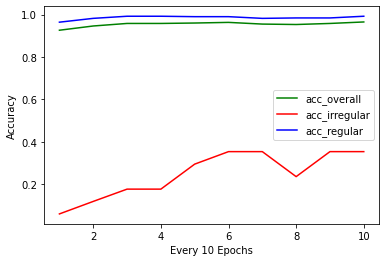

In [21]:
import matplotlib.pyplot as plt
acc_ushape = pd.DataFrame(acc_ushape, columns=['acc_overall', 'acc_regular', 'acc_irregular'])

x = range(1,11)

fig, ax = plt.subplots()
ax.plot(x,acc_ushape['acc_overall'], color = 'green', label = 'acc_overall')
ax.plot(x,acc_ushape['acc_irregular'], color = 'red', label = 'acc_irregular')
ax.plot(x, acc_ushape['acc_regular'], color = 'blue', label ='acc_regular')
ax.legend(loc = 'center right')
plt.xlabel('Every 10 Epochs')
plt.ylabel('Accuracy')
plt.show()

# Experiment2


In [147]:
!onmt_build_vocab -config data_structure_eng2.yaml -n_sample 13000


Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-09 20:36:00,341 INFO] Counter vocab from 13000 samples.
[2022-10-09 20:36:00,341 INFO] Build vocab on 13000 transformed examples/corpus.
[2022-10-09 20:36:01,203 INFO] Counters src:43
[2022-10-09 20:36:01,203 INFO] Counters tgt:38


In [148]:
!onmt_train -config data_structure_eng2.yaml

[2022-10-09 20:36:06,184 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-09 20:36:06,185 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-09 20:36:06,185 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-09 20:36:06,185 INFO] Parsed 2 corpora from -data.
[2022-10-09 20:36:06,185 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-09 20:36:06,185 INFO] Loading vocab from text file...
[2022-10-09 20:36:06,185 INFO] Loading src vocabulary from data2/run/example.vocab.src
[2022-10-09 20:36:06,186 INFO] Loaded src vocab has 43 tokens.
[2022-10-09 20:36:06,186 INFO] Loading tgt vocabulary from data2/run/example.vocab.tgt
[2022-10-09 20:36:06,186 INFO] Loaded tgt vocab has 38 tokens.
[2022-10-09 20:36:06,186 INFO] Building fields with vocab in counters...
[2022-10-09 20:36:06,186 INFO]  * tgt vocab size: 42.
[2022-10-09 20:36:06,187 INFO]  * src vocab size: 45.
[2022-10

In [ ]:
!onmt_translate -model data2/run/model_step_75205.pt -src data2/src_test_tagged.txt -output data/pred_experiment2.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-11 00:11:56,341 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-11 00:11:56,453 INFO] 
SENT 1: ['<V;PST>', 'r', '@', 'f', 'r', '&', 'k', 't']


In [ ]:
!onmt_translate -model data2/run/model_step_75205.pt -src data2/src_valid_tagged.txt -output data2/pred_experiment2_valid.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 11:24:08,040 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 11:24:08,171 INFO] 
SENT 1: ['<V;PST>', 't', 'r', 'E', 'd']
PRED 1: t r E d

In [ ]:
!onmt_translate -model data2/run/model_step_75205.pt -src data2/src_train_tagged.txt -output data2/pred_experiment2_train.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-09 18:07:16,143 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-09 18:07:16,349 INFO] 
SENT 1: ['<V;V.PTCP;PST>', 'm', 'A', ':', 's', 'k', '@'

In [ ]:
pred_eng2 = 'data/pred_experiment2.txt'
pred_eng2_valid = 'data2/pred_experiment2_valid.txt'
pred_eng2_train = 'data2/pred_experiment2_train.txt'
tgt_eng2_train = 'data2/tgt_train_tagged.txt'
src_eng2_train ='data2/src_train_tagged.txt'
english2 = 'RevisitPinkerAndPrince/experiment_2/english_merged.txt'
eng2_orth_train ='data2/src_train_orth.txt'

metainfo_ex2_phon_t = ['English', 'replication2_multi', 'phoneme', 'train', 'english2' ]
irre_eng2_train, reg_eng2_train, acc_eng2_train = evaluate(pred_eng2_train, tgt_eng2_train, english2, eng2_orth_train, src_eng2_train, metainfo_ex2_phon_t)
metainfo_ex2_phon = ['English', 'replication2_multi', 'phoneme', 'test' ]
irre_eng2, reg_eng2, acc_eng2 = evaluate(pred_eng2, eng_tgt_test, english, eng_orth_test, eng_src_test, metainfo_ex2_phon)
metainfo_ex2_phon_v = ['English', 'replication2_multi', 'phoneme', 'valid' ]
irre_eng2_valid, reg_eng2_valid, acc_eng2_valid = evaluate(pred_eng2_valid, eng_tgt_valid, english, eng_orth_valid, eng_src_valid, metainfo_ex2_phon_v)

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
1.0 		 1.0 		 0.996
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.965 		 0.995 		 0.294
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.953 		 0.992 		 0.158


In [114]:
with open(src_eng2_train, 'r') as ee:
    lines =ee.readlines()
    lines = set(get_word(lines))

print(len(lines))

with open(tgt_eng2_train, 'r') as aa:
    bb = aa.readlines()
    cc = set(get_word(bb))

print(len(cc))

14885
11920


In [142]:
irre_eng2

present_orth present_phon past_phon      pred  correct past_orth    reg
19      overcome      @Uv@kVm  @Uv@keIm  @Uv@kVmd    False  overcame  irreg
59           lie          laI       leI      laId    False       lay  irreg
127        begin        b@gIn     b@g&n    b@gInd    False     began  irreg
204          see          si:       sO:      si:d    False       saw  irreg
232       outrun       aUtrVn    aUtr&n    aUtrVn    False    outran  irreg
241          eat          i:t       eIt     i:tId    False       ate  irreg
280         keep         ki:p      kEpt     ki:pt    False      kept  irreg
329      forsake      fO:seIk    fO:sUk  fO:seIkt    False   forsook  irreg
357          sit          sIt       s&t     sItId    False       sat  irreg
400      foresee       fO:si:    fO:sO:   fO:si:d    False   foresaw  irreg

# Challenge

## Learning the past tense in the form of phonological transcription

### Dutch

In [37]:
!onmt_build_vocab -config data_structure_nld_pho.yaml -n_sample 5000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-07 15:44:18,586 INFO] Counter vocab from 5000 samples.
[2022-10-07 15:44:18,587 INFO] Build vocab on 5000 transformed examples/corpus.
[2022-10-07 15:44:19,306 INFO] Counters src:37
[2022-10-07 15:44:19,306 INFO] Counters tgt:37


In [38]:
!onmt_train -config data_structure_nld_pho.yaml

[2022-10-07 15:44:24,745 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-07 15:44:24,745 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-07 15:44:24,745 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-07 15:44:24,745 INFO] Parsed 2 corpora from -data.
[2022-10-07 15:44:24,745 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-07 15:44:24,745 INFO] Loading vocab from text file...
[2022-10-07 15:44:24,745 INFO] Loading src vocabulary from data_dutch/phon/example.vocab.src
[2022-10-07 15:44:24,745 INFO] Loaded src vocab has 37 tokens.
[2022-10-07 15:44:24,746 INFO] Loading tgt vocabulary from data_dutch/phon/example.vocab.tgt
[2022-10-07 15:44:24,746 INFO] Loaded tgt vocab has 37 tokens.
[2022-10-07 15:44:24,746 INFO] Building fields with vocab in counters...
[2022-10-07 15:44:24,746 INFO]  * tgt vocab size: 41.
[2022-10-07 15:44:24,746 INFO]  * src vocab size: 

In [39]:
!onmt_translate -model data_dutch/phon/model_step_24420.pt -src data_dutch/phon/src_test.txt -output data_dutch/phon/pred_experiment_dutch.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-07 16:09:44,609 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-07 16:09:44,740 INFO] 
SENT 1: ['v', '@', 'r', 'w', 'I', 'l', 'd', '@', 'r']
P

In [40]:
pred_dutch = 'data_dutch/phon/pred_experiment_dutch.txt'
test_dutch = 'data_dutch/phon/tgt_test.txt'
orth_dutch = 'data_dutch/orth/src_test.txt'
source_dutch = 'data_dutch/phon/src_test.txt'
dutch_merged = 'data_dutch/dutch_merged.txt'


In [136]:
metainfo_dutch=['dutch', 'extension', 'phoneme','test']
irreg_wrong, reg_wrong, acc_dutch = evaluate(pred_dutch, test_dutch, dutch_merged, orth_dutch, source_dutch, metainfo_dutch)

reg_wrong

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.891 		 0.93 		 0.569


present_orth present_phon   past_phon         pred  correct  \
14          melden        mEld@       mEld@        mOld@    False   
26        vervuilt      v@rvLlt    v@rvLld@       v@rvol    False   
31            zift         zIft       zIft@          zMf    False   
35          vereis        v@rKs     v@rKst@        v@res    False   
62         ontzilt      OntsIlt    OntsIlt@     OntsIld@    False   
65           kruit         krLt       krLd@         krot    False   
81          vreest        vrest      vrezd@       vrest@    False   
158        verzuil       v@rzLl    v@rzLld@       v@rzol    False   
162         ziften        zIft@       zIft@         zOf@    False   
182           hard         hArt       hArd@        hArt@    False   
191          meldt         mElt       mEld@         mOlt    False   
234            int          Int        Ind@         Int@    False   
236      verblindt     v@rblInt   v@rblInd@     v@rblOnt    False   
256      vervuilen      v@rvLl@    v@rvLld@      v@rvol@    False   
272         kruien        krLj@       krLd@        kroj@    False   
298  bevoorrechten    b@vorExt@   b@vorExt@  b@vorOx@nd@    False   
314        kastijd       kAstKt     kAstKd@       kAstet    False   
315     verblinden    v@rblInd@   v@rblInd@    v@rblOnd@    False   
346       kastijdt       kAstKt     kAstKd@       kAstet    False   
347         schrei         sxrK      sxrKd@        sxreK    False   
352        schreit        sxrKt      sxrKd@        sxret    False   
357    bevoorrecht     b@vorExt   b@vorExt@     b@vorOxt    False   
369        vervuil       v@rvLl    v@rvLld@       v@rvol    False   
370          hardt         hArt       hArd@        hArt@    False   
391         behoed        b@hut      b@hud@       b@hut@    False   
401        behoedt        b@hut      b@hud@       b@hut@    False   
415    vergezellen    v@rG@zEl@  v@rG@zEld@    v@rG@zOl@    False   
478       verzuilt      v@rzLlt    v@rzLld@       v@rzol    False   
488           meld         mElt       mEld@         mOlt    False   
497           krui          krL       krLd@         krox    False   
500          vegen         veG@       veGd@      veG@nd@    False   
502       vergezel     v@rG@zEl  v@rG@zEld@     v@rG@zOl    False   
511        vereist       v@rKst     v@rKst@        v@res    False   
514      vergezelt    v@rG@zElt  v@rG@zEld@     v@rG@zOl    False   
526          vrees         vres      vrezd@       vrest@    False   
550       schreien       sxrKj@      sxrKd@       sxrej@    False   
566       vereisen       v@rKs@     v@rKst@       v@res@    False   
600       verblind     v@rblInt   v@rblInd@     v@rblOnt    False   

          past_orth  reg  
14          meldden  reg  
26        vervuilde  reg  
31           ziftte  reg  
35         vereiste  reg  
62        ontziltte  reg  
65           kruide  reg  
81          vreesde  reg  
158       verzuilde  reg  
162         ziftten  reg  
182          hardde  reg  
191          meldde  reg  
234            inde  reg  
236      verblindde  reg  
256      vervuilden  reg  
272         kruiden  reg  
298  bevoorrechtten  reg  
314       kastijdde  reg  
315     verblindden  reg  
346       kastijdde  reg  
347        schreide  reg  
352        schreide  reg  
357   bevoorrechtte  reg  
369       vervuilde  reg  
370          hardde  reg  
391        behoedde  reg  
401        behoedde  reg  
415     vergezelden  reg  
478       verzuilde  reg  
488          meldde  reg  
497          kruide  reg  
500         veegden  reg  
502      vergezelde  reg  
511        vereiste  reg  
514      vergezelde  reg  
526         vreesde  reg  
550       schreiden  reg  
566       vereisten  reg  
600      verblindde  reg

### English

In [42]:

!onmt_build_vocab -config data_structure_en_pho.yaml -n_sample 5000


Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-07 16:10:11,964 INFO] Counter vocab from 5000 samples.
[2022-10-07 16:10:11,964 INFO] Build vocab on 5000 transformed examples/corpus.
[2022-10-07 16:10:12,647 INFO] Counters src:48
[2022-10-07 16:10:12,647 INFO] Counters tgt:48


In [43]:
!onmt_train -config data_structure_en_pho.yaml

[2022-10-07 16:10:16,494 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-07 16:10:16,495 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-07 16:10:16,495 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-07 16:10:16,496 INFO] Parsed 2 corpora from -data.
[2022-10-07 16:10:16,496 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-07 16:10:16,496 INFO] Loading vocab from text file...
[2022-10-07 16:10:16,496 INFO] Loading src vocabulary from data_eng/run/phon/example.vocab.src
[2022-10-07 16:10:16,496 INFO] Loaded src vocab has 48 tokens.
[2022-10-07 16:10:16,496 INFO] Loading tgt vocabulary from data_eng/run/phon/example.vocab.tgt
[2022-10-07 16:10:16,496 INFO] Loaded tgt vocab has 48 tokens.
[2022-10-07 16:10:16,497 INFO] Building fields with vocab in counters...
[2022-10-07 16:10:16,498 INFO]  * tgt vocab size: 52.
[2022-10-07 16:10:16,498 INFO]  * src vocab si

In [44]:
!onmt_translate -model data_eng/phon/model_step_24440.pt -src data_eng/phon/src_test.txt -output data_eng/phon/pred_experiment_eng.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-07 16:32:59,665 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-07 16:32:59,825 INFO] 
SENT 1: ['s', 'V', 'b', 's', 'I', 'd', '2', 'z', 'I', '

In [137]:
pred_eng = 'data_eng/phon/pred_experiment_eng.txt'
test_eng ='data_eng/phon/tgt_test.txt'
orth_eng = 'data_eng/orth/src_test.txt'
src_eng = 'data_eng/phon/src_test.txt'
english_merged = 'data_eng/english_merged.txt'

metainfo_eng=['English','extension', 'phoneme', 'test']
irreg_eng, reg_eng, acc_eng = evaluate(pred_eng, test_eng,english_merged, orth_eng, src_eng, metainfo_eng)

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.923 		 0.955 		 0.4


### German

In [46]:
!onmt_build_vocab -config data_structure_german_pho.yaml -n_sample 5000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-07 16:34:50,232 INFO] Counter vocab from 5000 samples.
[2022-10-07 16:34:50,232 INFO] Build vocab on 5000 transformed examples/corpus.
[2022-10-07 16:34:50,923 INFO] Counters src:42
[2022-10-07 16:34:50,923 INFO] Counters tgt:41


In [47]:
!onmt_train -config data_structure_german_pho.yaml

[2022-10-07 16:34:54,010 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-07 16:34:54,010 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-07 16:34:54,011 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-07 16:34:54,011 INFO] Parsed 2 corpora from -data.
[2022-10-07 16:34:54,011 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-07 16:34:54,011 INFO] Loading vocab from text file...
[2022-10-07 16:34:54,012 INFO] Loading src vocabulary from data_german/example.vocab.src
[2022-10-07 16:34:54,013 INFO] Loaded src vocab has 42 tokens.
[2022-10-07 16:34:54,014 INFO] Loading tgt vocabulary from data_german/example.vocab.tgt
[2022-10-07 16:34:54,020 INFO] Loaded tgt vocab has 41 tokens.
[2022-10-07 16:34:54,022 INFO] Building fields with vocab in counters...
[2022-10-07 16:34:54,023 INFO]  * tgt vocab size: 45.
[2022-10-07 16:34:54,024 INFO]  * src vocab size: 44.
[202

In [48]:
!onmt_translate -model data_german/model_step_24325.pt -src data_german/phon/src_test.txt -output data_german/phon/pred_experiment_german.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-07 16:53:53,902 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-07 16:53:54,012 INFO] 
SENT 1: ['S', 't', 'E', 'm', '@', 'n']
PRED 1: S t E m 

In [138]:
pred_german = 'data_german/phon/pred_experiment_german.txt'
test_german = 'data_german/phon/tgt_test.txt'
source_german = 'data_german/phon/src_test.txt'
german_merged ='data_german/german_merged.txt'
orth_german = 'data_german/orth/src_test.txt'

metainfo_german=['german', 'extension', 'phoneme', 'test']
irre_german, reg_german, acc_german = evaluate(pred_german, test_german, german_merged, orth_german, source_german, metainfo_german)
reg_german

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.926 		 0.95 		 0.595


present_orth    present_phon         past_phon            pred  \
49             wahrt            vart             vart@           vard@   
58          schwenkt          SvENkt           SvENkt@           Sv&Nk   
76       durchqueren      dUrxkver@n       dUrxkvert@n      dUrxvert@n   
131          beheizt          b@hW=t         b@hW=t@st         b@hi=st   
140    pasteurisiert     p&st|rizirt      p&st|rizirt@    p&stqrizirt@   
143           schade            Sad@            Sad@t@            Sad@   
172        schwenken         SvENk@n          SvENkt@n         Sv&Nk@n   
222  personifizierst  pErzonifi=irst  pErzonifi=irt@st  pErzoniZirt@st   
225        schwenkst         SvENkst         SvENkt@st         Sv&Nkst   
226         schwenke          SvENk@           SvENkt@           Sv&Nk   
269          schaden           Sad@n           Sad@t@n           Sad@n   
270        verfehlen        fErfel@n         fErfelt@n        fErfal@n   
282       durchquere       dUrxkver@        dUrxkvert@       dUrxvert@   
296   pasteurisieren    p&st|rizir@n     p&st|rizirt@n   p&stqrizirt@n   
341            grast           grast          grast@st         grat@st   
371        verfehlst        fErfelst        fErfelt@st        fErfalst   
376      durchquerst      dUrxkverst      dUrxkvert@st     dUrxvert@st   
388         verfehle         fErfel@          fErfelt@          fErfal   
439   personifiziere   pErzonifi=ir@    pErzonifi=irt@    pErzoniZirt@   
463         vertieft         fErtift          fErtift@          fErtaf   
509         schweben          Sveb@n           Svept@n          Svob@n   
514       durchquert       dUrxkvert        dUrxkvert@       dUrxvert@   
522   pasteurisierst    p&st|rizirst    p&st|rizirt@st  p&stqrizirt@st   
541          schadet           Sad@t            Sad@t@            Sad@   
573  personifizieren  pErzonifi=ir@n   pErzonifi=irt@n   pErzoni=irt@n   
584         vertiefe         fErtif@          fErtift@          fErtaf   
614    pasteurisiere     p&st|rizir@      p&st|rizirt@    p&stqrizirt@   
615        vertiefst        fErtifst        fErtift@st        fErtafst   
618        vertiefen        fErtif@n         fErtift@n        fErtaf@n   

     correct          past_orth  reg  
49     False             wahrte  reg  
58     False          schwenkte  reg  
76     False       durchquerten  reg  
131    False         beheiztest  reg  
140    False     pasteurisierte  reg  
143    False           schadete  reg  
172    False         schwenkten  reg  
222    False  personifiziertest  reg  
225    False        schwenktest  reg  
226    False          schwenkte  reg  
269    False          schadeten  reg  
270    False         verfehlten  reg  
282    False        durchquerte  reg  
296    False    pasteurisierten  reg  
341    False           grastest  reg  
371    False        verfehltest  reg  
376    False      durchquertest  reg  
388    False          verfehlte  reg  
439    False    personifizierte  reg  
463    False          vertiefte  reg  
509    False          schwebten  reg  
514    False        durchquerte  reg  
522    False   pasteurisiertest  reg  
541    False           schadete  reg  
573    False   personifizierten  reg  
584    False          vertiefte  reg  
614    False     pasteurisierte  reg  
615    False        vertieftest  reg  
618    False         vertieften  reg

# Visualization

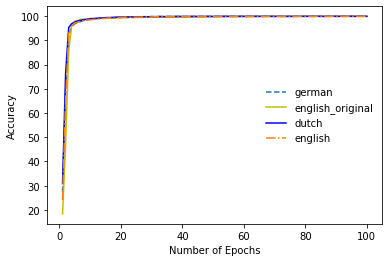

In [73]:
import re
import matplotlib.pyplot as plt
eng_dir_ex1 = 'data/phon/log_file_exp1.txt'
german_dir = 'data_german/log_file_german_pho.txt'
dutch_dir = 'data_dutch/phon/log_file_nld_pho.txt'
eng_dir = 'data_eng/phon/log_file_eng_pho.txt'

def get_accuracy(logfile_dir):
    log_file = open(logfile_dir, 'r').readlines()
    accuracy =[]
    for line in log_file:
        if 'acc' in line:
            acc = re.search('acc:\s+(\d{2}.\d{2})', line)
            if acc:
                accuracy.append(float(acc.group(1)))
    return accuracy


fig, ax = plt.subplots()
# print
x_axis = [x for x in range(1,101)]
acc_german = get_accuracy(german_dir) 
acc_eng1 = get_accuracy(eng_dir_ex1)
acc_dutch = get_accuracy(dutch_dir)
acc_eng = get_accuracy(eng_dir)
ax.plot(x_axis, acc_german, '--', label = 'german')
ax.plot(x_axis, acc_eng1,'y', label = 'english_original')
ax.plot(x_axis, acc_dutch,'b', label = 'dutch')
ax.plot(x_axis, acc_eng,'-.', label = 'english')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='center right', frameon=False)
 

In [69]:
len(acc_eng1)

300

In [70]:
len(acc_german)

100

In [71]:
len(acc_eng)

300

In [150]:
for i in range(2,12,2):
    print(i)

2
4
6
8
10
